##Task 1


---


####Authors:
#####Arijit Majumdar
#####Vinit Shahu
#####Karan Lunkad

#Objectives:
####Sales Managment  
1.   To Find Sales-trend -> 


> *   month wise
*   year wise
*   yearly month wise



2.   Find key metrics and factors and show the meaningful
relationships between attributes.

##MetaData Collection
####Amazon Food Data Set

---


 



1.   invoice date same as datekey:Represents Date of Transaction
2.   custkey:Unique CostumerId
3.   Discount Amount 
4.   Invoice Number
5.   Item Class (po1,p01)
6.   Item Number
7.   Item
8.   Line Number:The number of products in a product line refer to  its product line depth
9.   List Price: MRP 
10.  Order Number
11.  Promised Delivery Date
12.  Sales Amount: Selling price of total items
13.  Sales Amount Based on List Price:Expected SP of total items based on list price
14.  Sales Cost Amount
15.  Sales Margin Amount: profit/loss
16.  Sales Price: selling price of item
17. Sales Quantity: Qty of products
18. Sales Rep: No. of Reps
19. U/M: Unit of Measure(Each = EA, pair = PR, SE = Some SI Unit of KG/Gallon)



In [ ]:
#importing required libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ama_dataset = pd.read_csv('/content/drive/MyDrive/Internship/SALESDATA.csv')
ama_dataset.shape

(65282, 20)

##Studying the data

In [ ]:
ama_dataset.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,30-04-2017,-237.91,30-04-2017,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,30-04-2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,14-07-2017,368.79,14-07-2017,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,14-07-2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,17-10-2017,109.73,17-10-2017,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,16-10-2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,03-06-2017,-211.75,03-06-2017,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,03-06-2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,27-05-2017,96627.94,27-05-2017,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,28-05-2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [ ]:
ama_dataset.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [ ]:
#concise summary of the dataset 
ama_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  int64  
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  int64  
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  int64  
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  int64  
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [ ]:
#check for missing values
ama_dataset.isna().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [ ]:
#data cleaning
ama_dataset.dropna(inplace=True)
ama_dataset.isna().sum()

CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item Class                          0
Item Number                         0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [ ]:
(ama_dataset['DateKey'] == ama_dataset['Invoice Date']).unique()

array([ True])

In [ ]:
ama_dataset['Invoice Date'] = pd.to_datetime(ama_dataset['Invoice Date'])
ama_dataset['DateKey'] = pd.to_datetime(ama_dataset['DateKey'])

##Exploratory Data Analysis

In [ ]:
#what is the overall sale trend
ama_dataset['DateKey'].min()

Timestamp('2017-01-01 00:00:00')

In [ ]:
ama_dataset['DateKey'].max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
#Getting month year from the dataset
ama_dataset['month_year'] = ama_dataset['DateKey'].apply(lambda x: x.strftime('%Y-%m'))
ama_dataset['year'] = ama_dataset['DateKey'].apply(lambda x: x.strftime('%Y'))
ama_dataset['month'] = ama_dataset['DateKey'].apply(lambda x: x.strftime('%m'))

In [ ]:
#Grouping Month Year
ama_df_trend_myr = ama_dataset.groupby('month_year').sum()['Sales Amount'].reset_index()
#Grouping by Year
ama_df_trend_yr = ama_dataset.groupby('year').sum()['Sales Amount'].reset_index()
#Grouping by month
ama_df_trend_m = ama_dataset.groupby('month').sum()['Sales Amount'].reset_index()

###Objective 1.Plotting Sales Trends

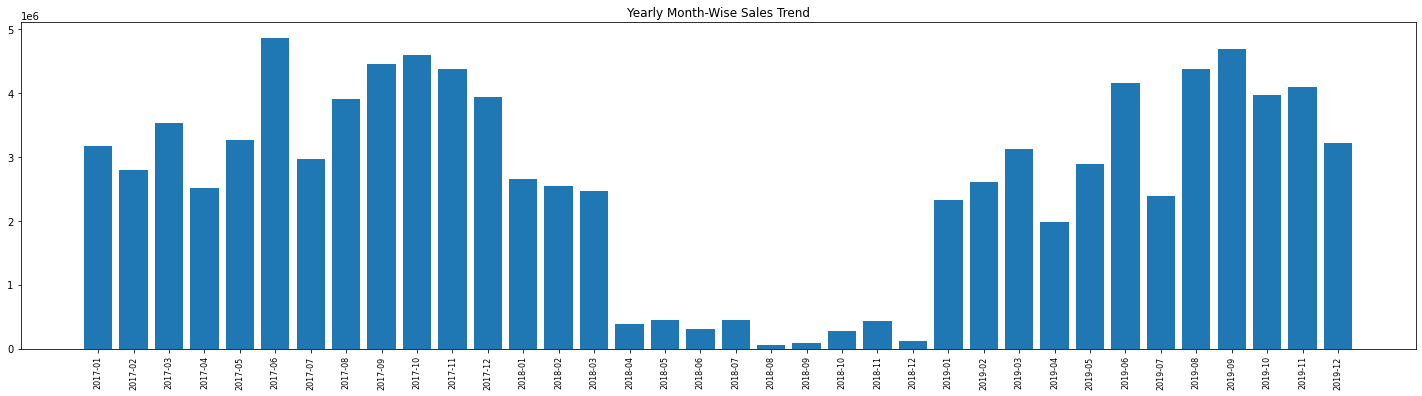

In [ ]:
plt.figure(figsize=(25,6))
plt.title('Yearly Month-Wise Sales Trend')
plt.bar(ama_df_trend_myr['month_year'], ama_df_trend_myr['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

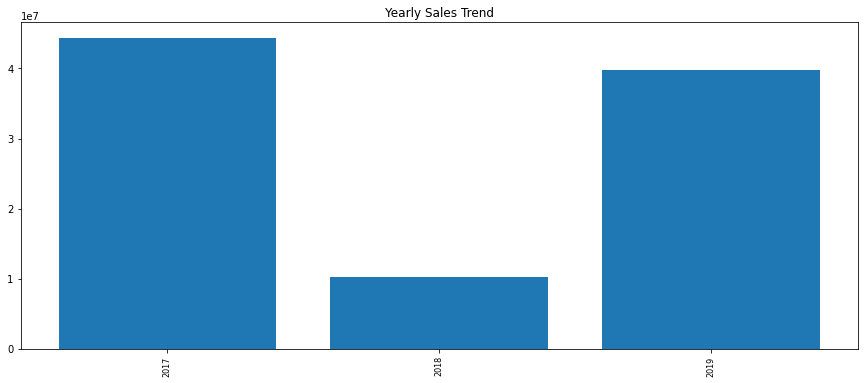

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Yearly Sales Trend')
plt.bar(ama_df_trend_yr['year'], ama_df_trend_yr['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

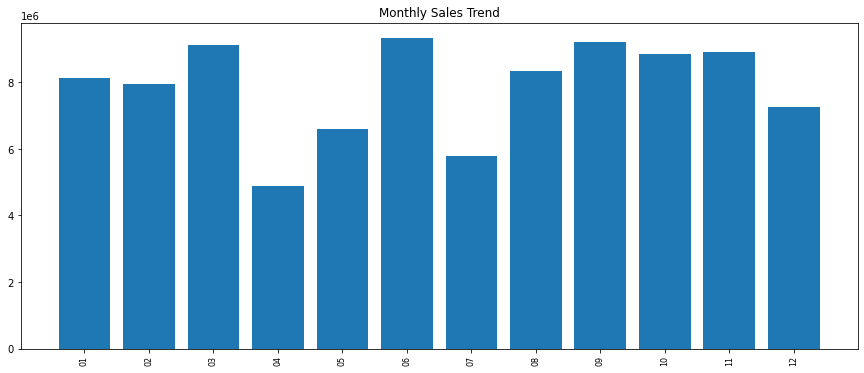

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Monthly Sales Trend')
plt.bar(ama_df_trend_m['month'], ama_df_trend_m['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

###1.Observations on Sales trends:-

*   On study of Yearly month wise sales trend we get to know in year 2018 from month April to december 2018 the sale were very low.
*   On study of Yearly sales trend we get to know that sales were very low in 2018.
*    On study of monthly sales trend we get to know that the sales are low in the months of April & July. 





###Objective 2.Finding key metrics,factors and meaningful relationships between attributes.

####Which are the top 10 Products in sales?

In [ ]:
#Grouping Item Column
Item_sales = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])
#Sorting Item_sales Column
Item_sales = Item_sales.sort_values('Sales Amount',ascending=False)

#Top 10 Items By sales
Item_sales[:10]

,Sales Amount
Item,
Ebony Squash,5377848.64
Big Time Frozen Cheese Pizza,5127171.17
Discover Manicotti,4901139.48
Better Fancy Canned Sardines,4526698.89
Moms Sliced Turkey,3386948.16
Imagine Popsicles,3347066.54
Cutting Edge Foot-Long Hot Dogs,3340837.52
Ebony Prepared Salad,2793741.24
Big Time Frozen Peas,2784626.53


####Which are the Bottom 10 Products in sales?

In [ ]:
Item_sales_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])
Item_sales_least = Item_sales_least.sort_values('Sales Amount',ascending=True)

#Bottom 10 Items By sales
Item_sales_least[:10]

,Sales Amount
Item,
Nationeel BBQ Potato Chips,200.55
Ebony Mixed Nuts,201.16
Just Right Rice Soup,202.46
Kiwi Lox,204.71
Imagine Grape Popsicles,205.32
Best Choice Sesame Crackers,206.98
Best Choice Beef Jerky,406.40
Fast Graham Crackers,435.53
Moms Foot-Long Hot Dogs,441.63


####Which are the 10 most selling items?

In [ ]:
#Grouping Item Column
most_selling_items = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])
#Sorting Item_sales Column
most_selling_items = most_selling_items.sort_values('Sales Quantity',ascending=False)

#Top 10 Items By sales
most_selling_items[:10]

,Sales Quantity
Item,
Moms Sliced Ham,27790
Big Time Frozen Cheese Pizza,27420
Walrus White Zinfandel Wine,22873
High Top Cauliflower,21751
Golden Frozen Corn,19623
Nationeel Potato Chips,15222
Even Better String Cheese,14159
Cutting Edge Foot-Long Hot Dogs,12902
Nationeel Salted Pretzels,12210


####Which are the Bottom 10 Products in amount sold?

In [ ]:
Item_sales_qty_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])
Item_sales_qty_least = Item_sales_qty_least.sort_values('Sales Quantity',ascending=True)

#Bottom 10 Items By amount sold 
Item_sales_qty_least[:10]

,Sales Quantity
Item,
Kiwi Lox,1
Best Corn Puffs,2
Carlson Chocolate Milk,2
Tell Tale Tangerines,3
Imagine Grape Popsicles,3
Blue Label Fancy Canned Clams,3
Atomic Mints,3
Best Choice Sesame Crackers,4
Colony Muffins,4


###2.Observations:- 

*   Top 10 selling products by sales amount by Descending: 

1.   Ebony Squash
2.   Big Time Frozen Cheese Pizza
1.   Discover Manicotti
2.   Better Fancy Canned Sardines,
1.   Moms Sliced Turkey
2.   Imagine Popsicles
1.   Cutting Edge Foot-Long Hot Dogs
2.   Ebony Prepared Salad
1.   Big Time Frozen Peas
2.   Walrus White Zinfandel Wine.


*   Top 10 selling products by sales quantity by Descending: 
1.   Moms Sliced Ham
2.   Big Time Frozen Cheese Pizza
1.   Walrus White Zinfandel Wine
2.   High Top Cauliflower,
1.   Golden Frozen Corn
2.   Nationeel Potato Chips
7.   Even Better String Cheese
8.   Cutting Edge Foot-Long Hot Dogs
9.   Nationeel Salted Pretzels
10.  High Top Dried Mushrooms

*   Bottom 10 selling products by sales amount by Ascending order: 
1.  Nationeel BBQ Potato Chips	
2.Ebony Mixed Nuts	
3.Just Right Rice Soup	
4.Kiwi Lox	
5.Imagine Grape Popsicles	
6.Best Choice Sesame Crackers	
7.Best Choice Beef Jerky	
8.Fast Graham Crackers	
9.Moms Foot-Long Hot Dogs	
10.Best Choice Dried Apricots	

*   Bottom 10 selling products by sales Qty by Ascending order: 
1.  Kiwi Lox	
2.Best Corn Puffs	
3.Carlson Chocolate Milk	
4.Tell Tale Tangerines	
5.Imagine Grape Popsicles	
6.Blue Label Fancy Canned Clams	
7.Atomic Mints	
8.Best Choice Sesame Crackers	
9.Colony Muffins	
10.Moms Foot-Long Hot Dogs		


####Analysing More Trends

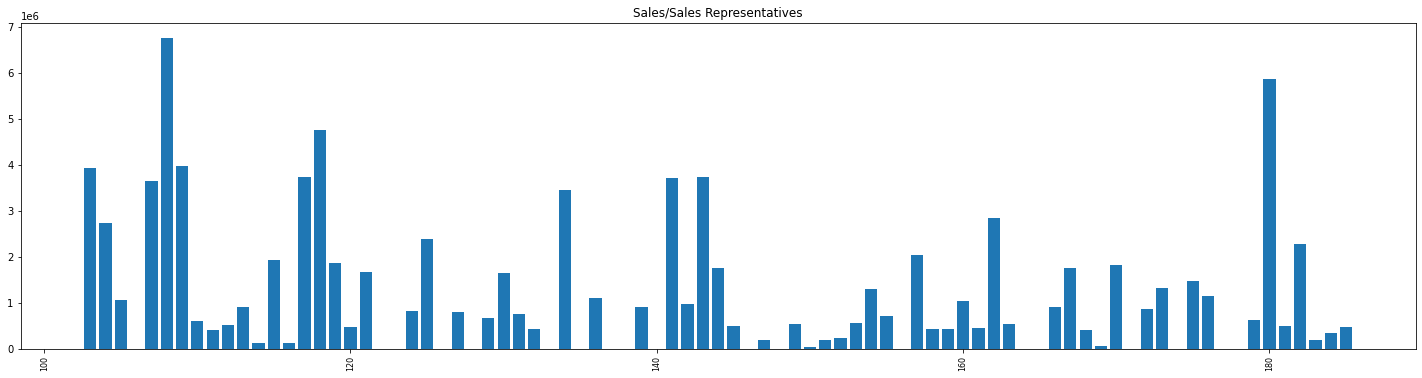

In [ ]:
ama_df_trend_salesrep = ama_dataset.groupby('Sales Rep').sum()['Sales Amount'].reset_index()
plt.figure(figsize=(25,6))
plt.title('Sales/Sales Representatives')
plt.bar(ama_df_trend_salesrep['Sales Rep'], ama_df_trend_salesrep['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

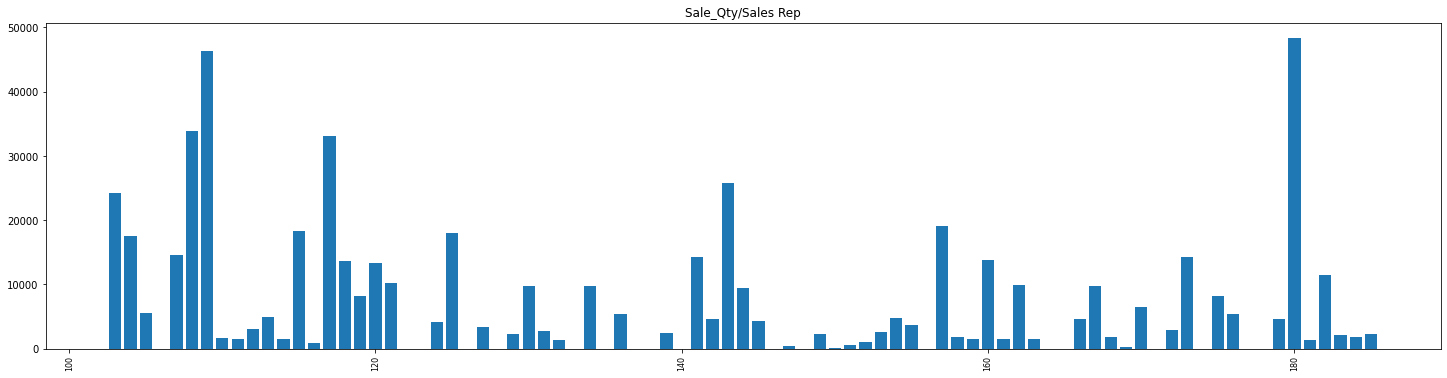

In [ ]:
ama_df_trend_salesrepqt = ama_dataset.groupby('Sales Rep').sum()['Sales Quantity'].reset_index()
plt.figure(figsize=(25,6))
plt.title('Sale_Qty/Sales Rep')
plt.bar(ama_df_trend_salesrepqt['Sales Rep'], ama_df_trend_salesrepqt['Sales Quantity'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

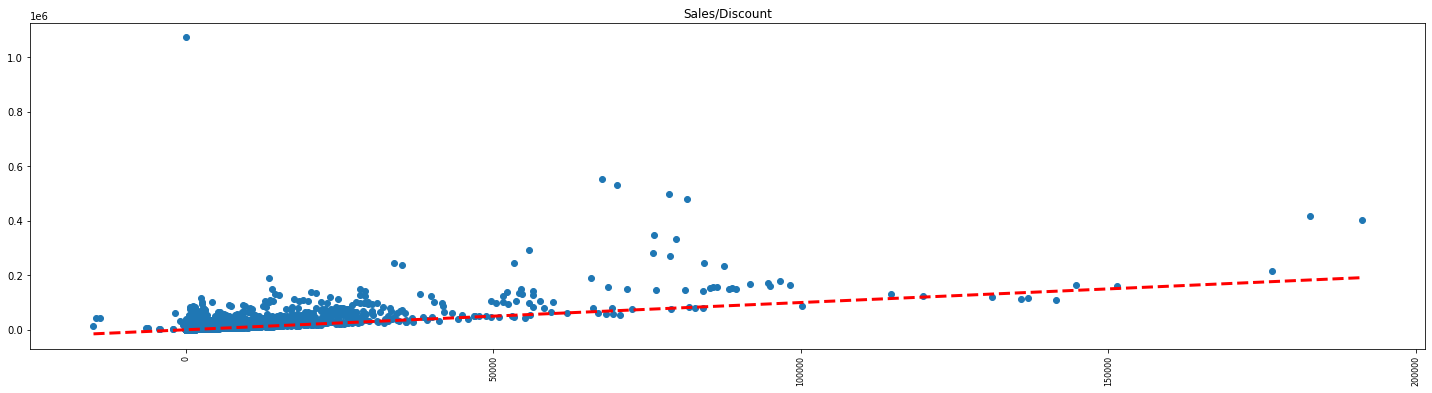

In [ ]:
ama_df_trend_disc = ama_dataset.groupby('Discount Amount').sum()['Sales Amount'].reset_index()
x = np.linspace(min(ama_df_trend_disc['Discount Amount']),max(ama_df_trend_disc['Discount Amount']), 1000)
plt.figure(figsize=(25,6))
plt.plot(x, x + 3, linestyle='--',color="red",linewidth=3)  # solid
plt.title('Sales/Discount')
plt.scatter(ama_df_trend_disc['Discount Amount'], ama_df_trend_disc['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

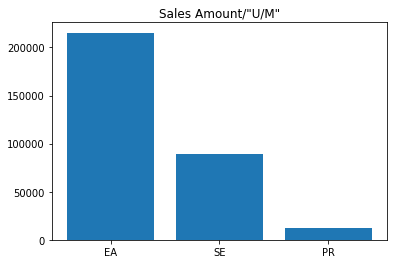

In [ ]:
plt.title('Sales Amount/"U/M"')
plt.bar(ama_dataset['U/M'],ama_dataset['Sales Amount'])
plt.show()

In [ ]:
ama_dataset['U/M'].value_counts()

EA    50973
SE     5375
PR      645
Name: U/M, dtype: int64

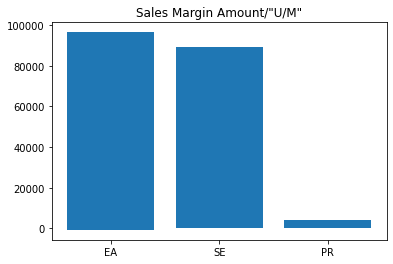

In [ ]:
plt.title('Sales Margin Amount/"U/M"')
plt.bar(ama_dataset['U/M'],ama_dataset['Sales Margin Amount'])
plt.show()

###3.Observations:-from the above plots
*   Sales/Sales Representatives do not have a significant relationship.
*   Sale Quantity/Sales Representatives do not have significant relationship.
*   Discount & sales are directly proportional to each other.
*  the sale in u/m of EA is significantly higher due to more quantity of product sold separately i.e why there is no significant relationship.(U/M: Unit of Measure(Each = EA, pair = PR, SE = Some SI Unit of KG/Gallon))
*   Profit on a products sold pair wise is greater in comparison for its quantity.





##Summary:
*   From Sales Trend analysis we note that the overall sales.
have been decreasing slightly and stagnant.(Sales were observed especially low in the year 2018 & months july and august.)
*   The Most High Selling & Profitable products are:
> *   Big Time Frozen Cheese Pizza
  *   Cutting Edge Foot-Long Hot Dogs
  *   Walrus White Zinfandel Wine.
*   The Least Selling & Least Profitable products are:
> * Kiwi Lox
  * Imagine Grape Popsicles
  * Best Choice Sesame Crackers
  * Moms Foot-Long Hot Dogs	  
*It is recommended to Purchase more of the products in the (The Most High Selling & Profitable products) and promote their sales as well as The Top 10 Sales generating products & Top 10 most sold products which have been mentioned in the observations.
*It is recommended to revaluate the quantity of products purchased (The Least Selling & Least Profitable products) which are generating the lowest sales as well as the Bottom 10 Sales generating products which can be found in the observations.
*Increasing the quantity of Sales Representatives are not increasing profits so it is recommended to revaluate their selection or decrease the investment required to hire them.
*Since Sales Increase on increasing the discount we recommend pushing the products which are sold the least with a high amount of discount.
*It is recommended To increase the quantity of SE products as its observed that they are generating highest margin with respect to their quantity.  




